In [2]:
!pip install text2emotion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import text2emotion as te



In [3]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
df = pd.read_csv(r"C:\Users\dell\Downloads\Tweets.csv")



In [12]:
df.shape
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [14]:
df.columns
df['airline_sentiment'].value_counts()
df['text'][0:5]


0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [16]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # URLs
    text = re.sub(r'@\w+|\#', '', text)                 # Mentions/hashtags
    text = re.sub(r'[^\w\s]', '', text)                 # Punctuations
    text = re.sub(r'\d+', '', text)                     # Numbers
    text = text.strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [18]:
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sid.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['clean_text'].apply(get_sentiment)


C:\Users\dell\AppData\Local\Temp\ipykernel_16648\16347014.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='pastel')


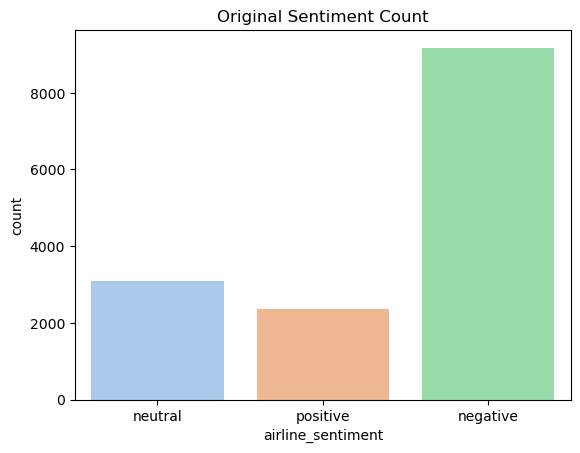

In [20]:
sns.countplot(x='airline_sentiment', data=df, palette='pastel')
plt.title("Original Sentiment Count")
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_16648\1715199858.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment', data=df, palette='coolwarm')


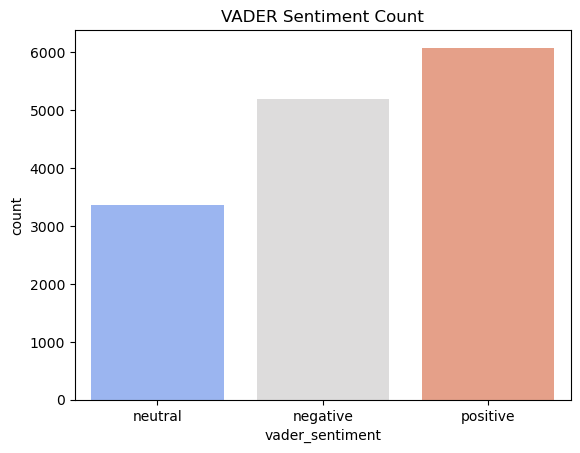

In [22]:
sns.countplot(x='vader_sentiment', data=df, palette='coolwarm')
plt.title("VADER Sentiment Count")
plt.show()


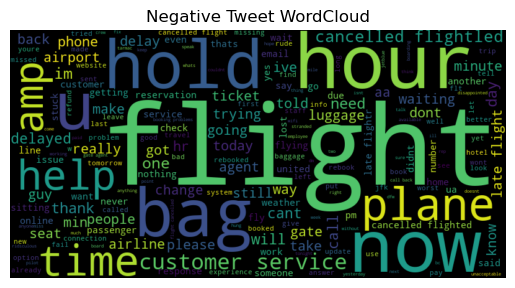

In [24]:
neg_text = " ".join(df[df['airline_sentiment'] == 'negative']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neg_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Tweet WordCloud")
plt.show()


In [28]:
pip install emoji==1.6.3


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170309 sha256=c7b89d866a7c5640e53449ac2b4fc28db222a50ff8503d3381cf2184e52e6df9
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\29\ac\d0\500333a69351f83b2d8fcae39a6c612abdc852621dd0f83c05
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.14.1
    Uninstalling emoji-2.14.1:
      Successfully uninstalled emoji-2.14.1
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install nrclex


INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.7 MB/s eta 0:00:00
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43341 sha256=e1a789799aeac634b4510ac9e59d5f2d710623a4f484208ba8932fb3608d063d
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\1f\e8\d0\e3c3da0ef3b37ef4381dbf5c9401f3a9861a63ce221b13d8bb
Successfully built nrclex
Note: you may need to restart the kernel to use updated packages.


In [40]:
!pip install nrclex
!pip install textblob


In [42]:
import nltk
nltk.download('punkt')  # Sentence tokenizer
nltk.download('averaged_perceptron_tagger')  # POS tagging


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [54]:
from nrclex import NRCLex

def extract_emotions(text):
    emotion = NRCLex(text)
    return emotion.raw_emotion_scores


In [56]:
import textblob
textblob.download_corpora.download_all()


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [58]:
from nrclex import NRCLex

def extract_emotions(text):
    emotion = NRCLex(text)
    return emotion.raw_emotion_scores

df['emotions'] = df['clean_text'].apply(extract_emotions)
df[['clean_text', 'emotions']].head()


,clean_text,emotions
0,what said,{}
1,plus youve added commercials to the experience...,{}
2,i didnt today must mean i need to take another...,{'surprise': 1}
3,its really aggressive to blast obnoxious enter...,"{'anger': 3, 'fear': 2, 'negative': 3, 'surpri..."
4,and its a really big bad thing about it,"{'anger': 1, 'disgust': 1, 'fear': 1, 'negativ..."


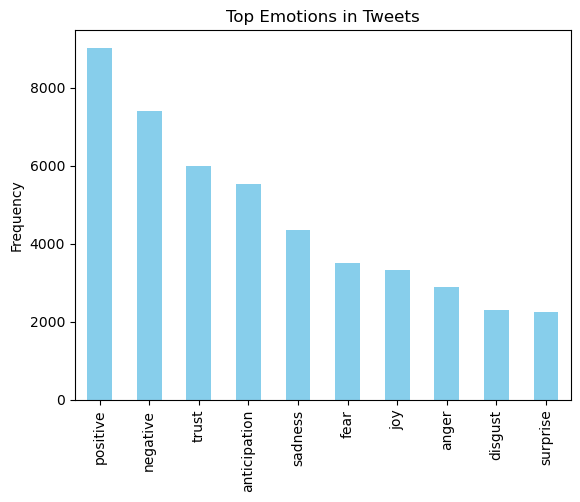

In [60]:
emotion_df = df['emotions'].apply(pd.Series).sum().sort_values(ascending=False)
emotion_df.plot(kind='bar', color='skyblue')
plt.title("Top Emotions in Tweets")
plt.ylabel("Frequency")
plt.show()
